In [477]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt


In [478]:
def nearest_neighbor_distance(X, Y):
    """
    Find the nearest (Euclidean) neighbor in B for each point in Ref
    A: Nx2 numpy array of source 2D points
    B: Nx2 numpy array of destination 2D point
    Returns:
    distances: Euclidean distances (errors) of the nearest neighbor
    indices: index of the nearest neighbor in B for each point in A
    """
    tree = KDTree(Y)
    distances, indices = tree.query(X) ##like we are looping in each point in X map it to Y
    return distances, indices


In [479]:
def draw(r, b):

   fig, ax = plt.subplots(figsize=(6,6))

    # Add the points to the plot
   ax.scatter(r[:, 0], r[:, 1], color='red', s=3)
   ax.scatter(b[:, 0] , b[:, 1], color='blue', s=3)

    # Set the x and y axis limits
   ax.set_xlim(-15, 15)
   ax.set_ylim(-15, 15)

    # Set the x and y axis labels
   ax.set_xlabel('X Axis')
   ax.set_ylabel('Y Axis')

    # Add a grid
   ax.grid(True)

    # Add visible x and y axes
   ax.axhline(y=0, color='black', linewidth=0.5)
   ax.axvline(x=0, color='black', linewidth=0.5)

    # Show the plot
   plt.show()


Create a cloud points in the form of numpy array with size (n,2)

In [480]:
cloud = np.empty((0, 2), dtype = int)
Rcloud = cloud
size  = 15

for j  in range (-size, size+1):
    for i  in range (-size, size+1):
        if (abs(i) <(size / 2 )and abs(j)<(size/2)):
            Rcloud = np.append(Rcloud, [[j,i]], axis=0)   
        cloud = np.append(cloud, [[j,i]], axis=0)


print(Rcloud.shape)


(225, 2)


Creat a roatated smaller version of that cloud

In [481]:
def rotate (A, theta):
    theta = np.deg2rad(theta)  # angle in radians
    R30 = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
    return np.matmul(R30, A.T).T

Rcloud = rotate(Rcloud,15)

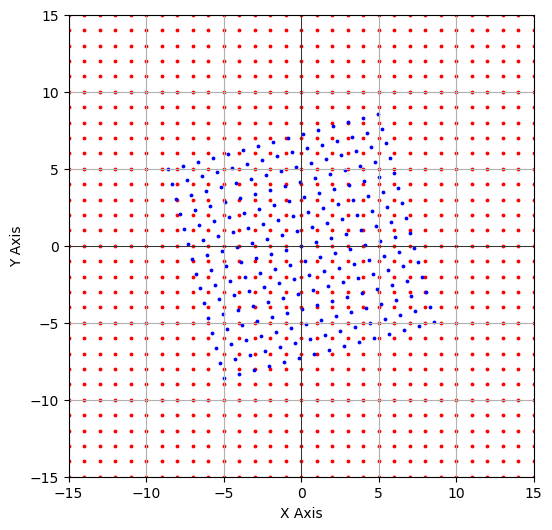

In [482]:
draw(cloud, Rcloud)

now we start

In [486]:

def icp (X, YOrigin, max_iterations=1):

    m = X.shape[1]
    TotalR = np.identity(m)
    Totalt = np.zeros(shape=(m,))
    
    
    for i in range(max_iterations):      
        _, indices = nearest_neighbor_distance(X,YOrigin)
        Y= YOrigin[indices] #the new mapping

        Xo = np.mean(X, axis=0)
        Yo = np.mean(Y, axis=0)

        H =  np.matmul( (X-Xo).T,(Y-Yo) )


        U, _, Vt = np.linalg.svd(H)



        
        R = np.dot(Vt.T, U.T)
        
        if np.linalg.det(R) < 0:
            Vt[m-1,:] *= -1
            R = np.dot(Vt.T, U.T)
        
        t = Yo - np.matmul( R,Xo)
        
       
        TotalR = np.matmul(TotalR, R)
        
 
      
        Totalt = np.dot(R, t) + Totalt


        X = np.matmul( R,(X-Xo).T).T + Yo
        
    return TotalR,Totalt,X

In [487]:
cloud = np.array([[1,1],[-1,-1],[3,3],[-3,-3],[2,2],[-2,-2]])


Rcloud = np.array(cloud) 



Rcloud[:, 0] += 10
Rcloud[:, 1] += -10


Rcloud = rotate(Rcloud , 0)

R, t,X = icp (Rcloud, cloud)


print(t)






[-10.  10.]


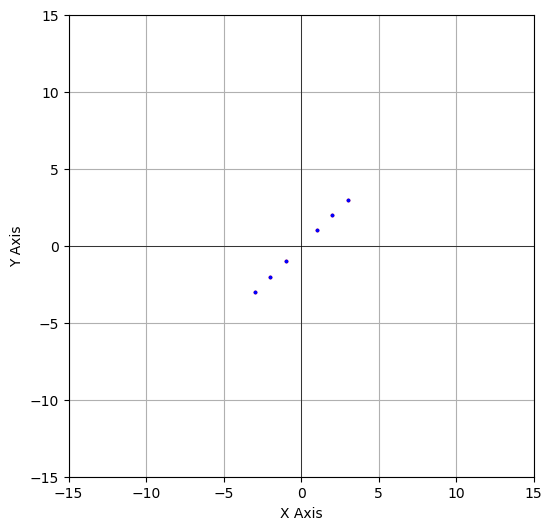

(6, 2)

In [488]:
draw(cloud,X)
X.shape